In [1]:
import rasterio
import numpy as np
import os
import glob
from matplotlib import pyplot

In [2]:
# Load 'Prob_Image' class that was defined in ProbImage_CLass.ipynb
%run ProbImage_Class.ipynb
%run BULCU_Inputs_Class.ipynb
%run Shapelet_class.ipynb

In [3]:
class Retrieve_Image(Prob_Image):
    def get_crop_year(self, year_id):
        return self.crop_stack[year_id,:,:]
#     def mask_of_slope(self, slope_thresh):
#         # create a mask from a pair of thresholds
#         mask = np.copy(self.slope_image) 
        
#         mask[mask <= slope_thresh] = -99
#         mask[mask > slope_thresh] = 0
#         mask[mask == -99] = 1
#         return mask
    def mask_of_init_crop(self, init_thresh):
        # creare a crop mask from init crop prob
        mask = np.copy(self.init_crop_prob)
        mask[self.init_crop_prob>=init_thresh] = 1
        mask[self.init_crop_prob<init_thresh] = 0
        return mask
    def get_crop_year_slope_masked(self, year_id, mask):
        return self.crop_stack[year_id,:,:] * mask
        

In [4]:
test1 = Retrieve_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/BULCU-all_2016_backward/grid_1766_BULCU.tif')
slope_image = test1.slope_image
slope_mask = test1.mask_of_slope(-0.1,usenan=0)
slope_mask_n003 = test1.mask_of_slope(-0.03,usenan=0)
init_crop_mask = test1.mask_of_init_crop(0.8)
test1_shapelet = Shapelet_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_grid2500_2016backward/BULCU-all_2016_backward/grid_1766_BULCU.tif')

In [ ]:
pyplot.hist(slope_image.flatten(), bins=200)
pyplot.show()

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
fig, axs = pyplot.subplots(1, 4,figsize = [70,30]) # row, col
subplt_title_size = 70
pyplot.subplots_adjust(bottom=0.1, top=1, hspace=0.2)
pyplot.tight_layout()
#fig.set_size_inches(20.5, 12.5)

# first row:
# slope image, slope thesh=-0.04; slope thesh=-0.03; slope thesh=-0.01;

im = axs[0].imshow(slope_image, cmap='RdBu_r') #viridis_r; plasma_r; inferno_r
axs[0].set_title("slope image",fontsize=subplt_title_size)
axs[1].imshow(test1.mask_of_slope(-0.03,usenan=0), cmap='Greys_r')
axs[1].set_title("slope threshold=-0.03",fontsize=subplt_title_size)
axs[2].imshow(test1.mask_of_slope(-0.015,usenan=0), cmap='Greys_r')
axs[2].set_title("slope threshold=-0.015",fontsize=subplt_title_size)
axs[3].imshow(test1.mask_of_slope(-0.0001,usenan=0), cmap='Greys_r')
axs[3].set_title("slope threshold=-0.0001",fontsize=subplt_title_size)

# # second row:
# # GFSAD 2015; slope thresh(-0.04)*GFSAD; slope thresh(-0.03)*GFSAD; slope thresh(-0.01)*GFSAD
# gfsad = rasterio.open('/media/sitian/HDD1/GFSAD/Grid_GFSAD2015/grid1766.tif').read()

# axs[1,0].imshow(gfsad.reshape(731,869), cmap='YlGn')
# axs[1,0].set_title("GFSAD 2015",fontsize=subplt_title_size)

# axs[1,1].imshow(gfsad.reshape(731,869)*test1.mask_of_slope(-0.03), cmap='Greys_r')
# axs[1,1].set_title("GFSAD 2015",fontsize=subplt_title_size)

# axs[1,2].imshow(gfsad.reshape(731,869)*test1.mask_of_slope(-0.015), cmap='Greys_r')
# axs[1,2].set_title("GFSAD 2015",fontsize=subplt_title_size)

# axs[1,3].imshow(gfsad.reshape(731,869)*test1.mask_of_slope(-0.0001), cmap='Greys_r')
# axs[1,3].set_title("GFSAD 2015",fontsize=subplt_title_size)

# remove x/y ticks (like coords) for all subplots
# for ax in axs:
#     for ax_1d in ax:
#         ax_1d.set_xticks([])
#         ax_1d.set_yticks([])

cbar_ax = fig.add_axes([-0.05, 0.265, 0.02, 0.475]) # x off-set; y off-set; thickness, height;  -0.05, 0.52, 0.02, 0.47 for 2 row
cbar_ax.tick_params(labelsize=40) 
fig.colorbar(im, cax=cbar_ax)

pyplot.savefig("output_figures/slope_thresholding.png",bbox_inches='tight')

In [6]:
gfsad = rasterio.open('/media/sitian/HDD1/GFSAD/Grid_GFSAD2015/grid1766.tif').read()
gfsad.shape

(1, 731, 869)

In [ ]:
fig, axs = pyplot.subplots(4, 4,figsize = [30,25]) # row, col
pyplot.subplots_adjust(bottom=0.5, top=1, hspace=0)
subplt_title_size = 20
#fig.set_size_inches(20.5, 12.5)
im00=axs[0,0].imshow(test1.get_crop_year(0), cmap='inferno')
axs[0,0].set_title("2015",fontsize=subplt_title_size)
#axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[0,1].imshow(test1.get_crop_year(5), cmap='inferno') #YlGn is friendly for people who can't distinguish red-green (RdYlGn)
axs[0,1].set_title("2010",fontsize=subplt_title_size)
#axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].imshow(test1.get_crop_year(10), cmap='inferno')
axs[0,2].set_title("2005",fontsize=subplt_title_size)
#axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[0,3].imshow(test1.get_crop_year(15), cmap='inferno')
axs[0,3].set_title("2000",fontsize=subplt_title_size)
axs[0,3].yaxis.set_label_position("right")
axs[0,3].yaxis.tick_right()
cmap1 = pyplot.get_cmap('inferno')
cmap1.set_bad(color = 'black', alpha = 1.)

# add color bar for row 1
cb_ax = fig.add_axes([0.0, 0.76, 0.017, 0.223]) # 
cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')


axs[1,0].imshow(test1.get_crop_year_slope_masked(0, init_crop_mask), cmap=cmap1)
axs[1,0].set_title("2015",fontsize=subplt_title_size)
#axs[1,0].set_xticks([])
axs[1,0].set_yticks([])


axs[1,1].imshow(test1.get_crop_year_slope_masked(5, init_crop_mask), cmap='inferno')
axs[1,1].set_title("2010",fontsize=subplt_title_size)

#axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(test1.get_crop_year_slope_masked(10, init_crop_mask), cmap='inferno')
axs[1,2].set_title("2005",fontsize=subplt_title_size)
#axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

axs[1,3].imshow(test1.get_crop_year_slope_masked(15, init_crop_mask), cmap='inferno')
axs[1,3].set_title("2000",fontsize=subplt_title_size)
axs[1,3].yaxis.set_label_position("right")
axs[1,3].yaxis.tick_right()

# Slope image
im20 = axs[2,0].imshow(slope_image*-1, cmap='RdBu') #viridis_r; plasma_r; inferno_r
axs[2,0].set_title("slope image",fontsize=subplt_title_size)
#axs[2,0].set_xticks([])
axs[2,0].set_yticks([])

axs[2,1].imshow(test1.mask_of_slope(-0.03), cmap='Greys_r')
axs[2,1].set_title("slope threshold=0.03",fontsize=subplt_title_size)
#axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

axs[2,2].imshow(test1.mask_of_slope(-0.02), cmap='Greys_r')
axs[2,2].set_title("slope threshold=0.02",fontsize=subplt_title_size)
#axs[2,2].set_xticks([])
axs[2,2].set_yticks([])


axs[2,3].imshow(test1.mask_of_slope(-0.01), cmap='Greys_r')
axs[2,3].set_title("slope threshold=0.01",fontsize=subplt_title_size)
axs[2,3].yaxis.set_label_position("right")
axs[2,3].yaxis.tick_right()

# add color bar for row 3
cb_ax = fig.add_axes([0.0, 0.26, 0.017, 0.223])
cbar = fig.colorbar(im20, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

# Google Image
from matplotlib import image

axs[3,0].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2015.png'))
axs[3,0].set_title("2015",fontsize=subplt_title_size)
axs[3,1].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2010.png'))
axs[3,1].set_title("2010",fontsize=subplt_title_size)
axs[3,2].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2005.png'))
axs[3,2].set_title("2005",fontsize=subplt_title_size)
axs[3,3].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2000.png'))
axs[3,3].set_title("2000",fontsize=subplt_title_size)

for i in range(4):
    axs[3,i].set_xticks([])
    axs[3,i].set_yticks([])
    axs[3,i].set_aspect(0.95)

fig.tight_layout()

#pyplot.savefig("output_figures/bulc-u_and_masked_crop_4.png",bbox_inches='tight')

## Add Landsat and unsupervised classifications

In [7]:
ls2015 = Landsat_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_input_images/Grid1766_2015_LS.tif')
ls2010 = Landsat_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_input_images/Grid1766_2010_LS.tif')
ls2005 = Landsat_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_input_images/Grid1766_2005_LS.tif')
ls2000 = Landsat_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_input_images/Grid1766_2000_LS.tif')

In [8]:
clusters = Cluster_Image('/media/sitian/HDD1/BULCU_TIFFS/BULCU_input_images/Grid1766_SNIC.tif')

In [9]:
ls2015.rgb_stack

array([[[0.598, 0.681, 0.668, ..., 0.697, 0.729, 0.646],
        [0.562, 0.544, 0.591, ..., 0.684, 0.658, 0.654],
        [0.542, 0.528, 0.553, ..., 0.668, 0.664, 0.632],
        ...,
        [0.581, 0.575, 0.622, ..., 0.832, 0.594, 0.745],
        [0.501, 0.576, 0.568, ..., 0.667, 0.665, 0.642],
        [0.479, 0.554, 0.599, ..., 0.784, 0.786, 0.665]],

       [[0.515, 0.564, 0.572, ..., 0.635, 0.701, 0.549],
        [0.494, 0.488, 0.522, ..., 0.661, 0.669, 0.633],
        [0.528, 0.514, 0.525, ..., 0.65 , 0.654, 0.633],
        ...,
        [0.541, 0.54 , 0.568, ..., 0.729, 0.529, 0.717],
        [0.49 , 0.511, 0.519, ..., 0.644, 0.658, 0.663],
        [0.486, 0.5  , 0.521, ..., 0.725, 0.75 , 0.702]],

       [[0.363, 0.399, 0.393, ..., 0.498, 0.478, 0.385],
        [0.381, 0.354, 0.376, ..., 0.433, 0.446, 0.452],
        [0.351, 0.342, 0.344, ..., 0.459, 0.453, 0.452],
        ...,
        [0.403, 0.396, 0.411, ..., 0.55 , 0.368, 0.538],
        [0.357, 0.381, 0.375, ..., 0.494, 0.4

In [ ]:
pyplot.hist(ls2015.rgb_stack.flatten(), bins=20)
pyplot.show()

In [ ]:
pyplot.imshow(ls2015.rgb_stack.transpose(1,2,0))
pyplot.show()

In [ ]:
fig, axs = pyplot.subplots(6, 4,figsize = [24,30]) # row, col
pyplot.subplots_adjust(bottom=0.5, top=1, hspace=0)
subplt_title_size = 20
#fig.set_size_inches(20.5, 12.5)

#Landsat rgb
im00=axs[0,0].imshow(ls2015.rgb_stack.transpose(1,2,0))
axs[0,0].set_title("2015",fontsize=subplt_title_size)
#axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[0,1].imshow(ls2010.rgb_stack.transpose(1,2,0)) 
axs[0,1].set_title("2010",fontsize=subplt_title_size)
#axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].imshow(ls2005.rgb_stack.transpose(1,2,0))
axs[0,2].set_title("2005",fontsize=subplt_title_size)
#axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[0,3].imshow(ls2000.rgb_stack.transpose(1,2,0))
axs[0,3].set_title("2000",fontsize=subplt_title_size)
axs[0,3].yaxis.set_label_position("right")
axs[0,3].yaxis.tick_right()

# cluster image
#colors = cmap(np.arange(20) % cmap.N)
im00=axs[1,0].imshow(clusters.cluster_2015)
axs[1,0].set_title("2015",fontsize=subplt_title_size)
#axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[1,1].imshow(clusters.cluster_2010) 
axs[1,1].set_title("2010",fontsize=subplt_title_size)
#axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(clusters.cluster_2005)
axs[1,2].set_title("2005",fontsize=subplt_title_size)
#axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

axs[1,3].imshow(clusters.cluster_2000)
axs[1,3].set_title("2000",fontsize=subplt_title_size)
axs[1,3].yaxis.set_label_position("right")
axs[1,3].yaxis.tick_right()

# BULCU outputs
im00=axs[2,0].imshow(test1.get_crop_year(0), cmap='inferno')
axs[2,0].set_title("2015",fontsize=subplt_title_size)
#axs[2,0].set_xticks([])
axs[2,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[2,1].imshow(test1.get_crop_year(5), cmap='inferno') #YlGn is friendly for people who can't distinguish red-green (RdYlGn)
axs[2,1].set_title("2010",fontsize=subplt_title_size)
#axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

axs[2,2].imshow(test1.get_crop_year(10), cmap='inferno')
axs[2,2].set_title("2005",fontsize=subplt_title_size)
#axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

axs[2,3].imshow(test1.get_crop_year(15), cmap='inferno')
axs[2,3].set_title("2000",fontsize=subplt_title_size)
axs[2,3].yaxis.set_label_position("right")
axs[2,3].yaxis.tick_right()
cmap1 = pyplot.get_cmap('inferno')
cmap1.set_bad(color = 'black', alpha = 1.)

# add color bar for row 1
cb_ax = fig.add_axes([0.0, 0.339, 0.017, 0.315]) # left, y, width, length
cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')


axs[3,0].imshow(test1.get_crop_year_slope_masked(0, init_crop_mask), cmap=cmap1)
axs[3,0].set_title("2015",fontsize=subplt_title_size)
#axs[3,0].set_xticks([])
axs[3,0].set_yticks([])


axs[3,1].imshow(test1.get_crop_year_slope_masked(5, init_crop_mask), cmap='inferno')
axs[3,1].set_title("2010",fontsize=subplt_title_size)

#axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

axs[3,2].imshow(test1.get_crop_year_slope_masked(10, init_crop_mask), cmap='inferno')
axs[3,2].set_title("2005",fontsize=subplt_title_size)
#axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

axs[3,3].imshow(test1.get_crop_year_slope_masked(15, init_crop_mask), cmap='inferno')
axs[3,3].set_title("2000",fontsize=subplt_title_size)
axs[3,3].yaxis.set_label_position("right")
axs[3,3].yaxis.tick_right()

# Slope image
im20 = axs[4,0].imshow(slope_image*-1, cmap='RdBu') #viridis_r; plasma_r; inferno_r
axs[4,0].set_title("slope image",fontsize=subplt_title_size)
#axs[4,0].set_xticks([])
axs[4,0].set_yticks([])

axs[4,1].imshow(test1.mask_of_slope(-0.03), cmap='Greys_r')
axs[4,1].set_title("slope threshold=0.03",fontsize=subplt_title_size)
#axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

axs[4,2].imshow(test1.mask_of_slope(-0.02), cmap='Greys_r')
axs[4,2].set_title("slope threshold=0.02",fontsize=subplt_title_size)
#axs[4,2].set_xticks([])
axs[4,2].set_yticks([])


axs[4,3].imshow(test1.mask_of_slope(-0.01), cmap='Greys_r')
axs[4,3].set_title("slope threshold=0.01",fontsize=subplt_title_size)
axs[4,3].yaxis.set_label_position("right")
axs[4,3].yaxis.tick_right()

# add color bar for row 3
cb_ax = fig.add_axes([0.0, 0.168, 0.017, 0.15]) # left, y,width, length
cbar = fig.colorbar(im20, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

# Google Image
from matplotlib import image

axs[5,0].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2015.png'))
axs[5,0].set_title("2015",fontsize=subplt_title_size)
axs[5,1].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2010.png'))
axs[5,1].set_title("2010",fontsize=subplt_title_size)
axs[5,2].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2005_b.png'))
axs[5,2].set_title("2005",fontsize=subplt_title_size)
axs[5,3].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2000_b.png'))
axs[5,3].set_title("2000",fontsize=subplt_title_size)

for i in range(4):
    axs[5,i].set_xticks([])
    axs[5,i].set_yticks([])
    axs[5,i].set_aspect(0.95)

fig.tight_layout()
#pyplot.savefig("output_figures/bulc-u_and_masked_crop_5.png",bbox_inches='tight')

In [11]:
shapelet_year = 2015-test1_shapelet.shapelet_2d(w=3,out_type=np.double,fill_val=np.nan)
shapelet_year003 = 2015-test1_shapelet.shapelet_2d(w=3,mask=test1.mask_of_slope(-0.03,usenan=1),out_type=np.double,fill_val=np.nan)
shapelet_year002 = 2015-test1_shapelet.shapelet_2d(w=3,mask=test1.mask_of_slope(-0.02,usenan=1),out_type=np.double,fill_val=np.nan)
shapelet_year001 = 2015-test1_shapelet.shapelet_2d(w=3,mask=test1.mask_of_slope(-0.01,usenan=1),out_type=np.double,fill_val=np.nan)

GAP done
640048
Start t score calculation


/tmp/ipykernel_21979/1739370206.py:167: RuntimeWarning: Mean of empty slice
  N_mean = np.nanmean(N, axis=1)
/tmp/ipykernel_21979/1739370206.py:168: RuntimeWarning: Degrees of freedom <= 0 for slice.
  N_var = np.nanvar(N, axis=1)
/tmp/ipykernel_21979/1739370206.py:180: RuntimeWarning: invalid value encountered in true_divide
  t =  numerator/(denominator1*denominator2)


The mask is none
before return
GAP done
640048
Start t score calculation
Using mask
before return
GAP done
640048
Start t score calculation
Using mask
before return
GAP done
640048
Start t score calculation
Using mask
before return


In [ ]:
import matplotlib
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# cmap_1=pyplot.cm.get_cmap('RdYlBu_r')
# cmap_1.set_bad('black',999)
top = cm.get_cmap('Oranges', 8)
bottom = cm.get_cmap('Blues_r', 8)
newcolors = np.vstack((bottom(np.linspace(0., 1, 8)),
                       top(np.linspace(0., 1, 8))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
#cmap = matplotlib.cm.jet
newcmp.set_bad('black')

In [ ]:
im99=pyplot.imshow(hotspots,cmap=newcmp)
pyplot.colorbar(im99, extend='both')
pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_21979/3862468862.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


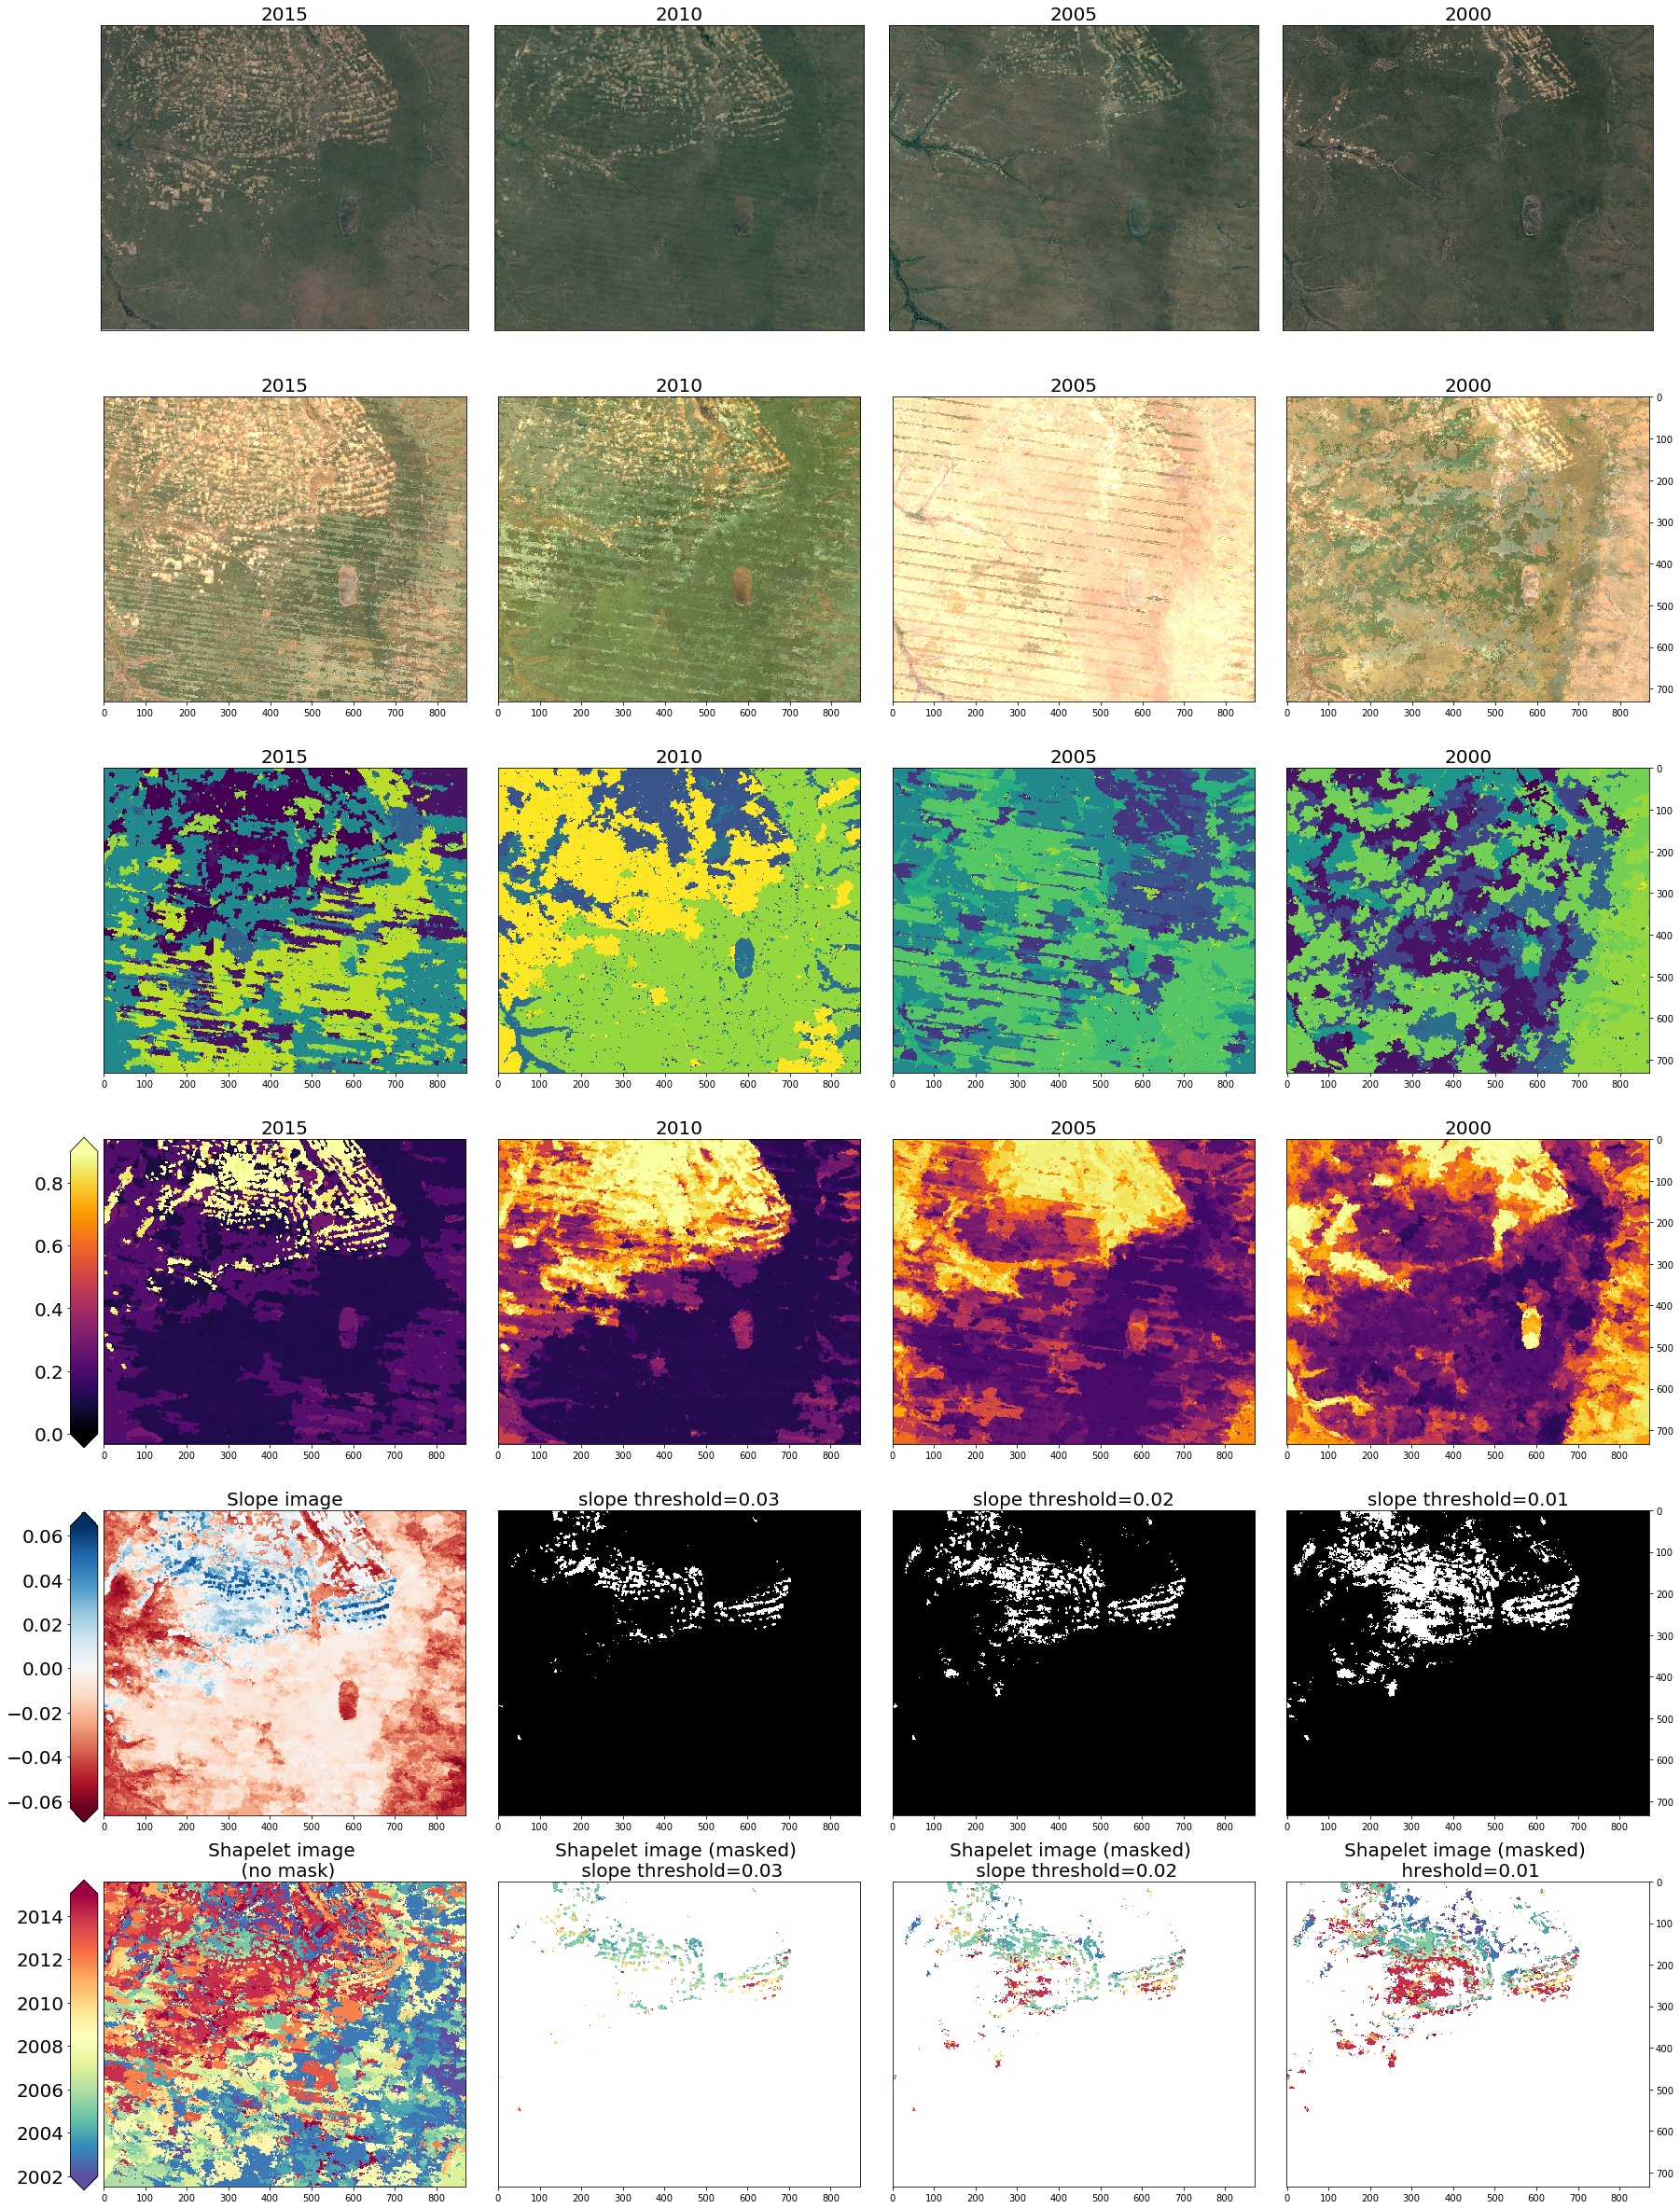

In [12]:
fig, axs = pyplot.subplots(6, 4,figsize = [24,33]) # row, col
pyplot.subplots_adjust(bottom=0.5, top=1, hspace=0)
subplt_title_size = 20
#fig.set_size_inches(20.5, 12.5)

# Google Image
from matplotlib import image

axs[0,0].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2015.png'))
axs[0,0].set_title("2015",fontsize=subplt_title_size)
axs[0,1].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2010.png'))
axs[0,1].set_title("2010",fontsize=subplt_title_size)
axs[0,2].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2005_b.png'))
axs[0,2].set_title("2005",fontsize=subplt_title_size)
axs[0,3].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2000_b.png'))
axs[0,3].set_title("2000",fontsize=subplt_title_size)

for i in range(4):
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[0,i].set_aspect(0.95)

#Landsat rgb
im00=axs[1,0].imshow(ls2015.rgb_stack.transpose(1,2,0))
axs[1,0].set_title("2015",fontsize=subplt_title_size)
#axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[1,1].imshow(ls2010.rgb_stack.transpose(1,2,0)) 
axs[1,1].set_title("2010",fontsize=subplt_title_size)
#axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(ls2005.rgb_stack.transpose(1,2,0))
axs[1,2].set_title("2005",fontsize=subplt_title_size)
#axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

axs[1,3].imshow(ls2000.rgb_stack.transpose(1,2,0))
axs[1,3].set_title("2000",fontsize=subplt_title_size)
axs[1,3].yaxis.set_label_position("right")
axs[1,3].yaxis.tick_right()

# cluster image
#colors = cmap(np.arange(20) % cmap.N)
im00=axs[2,0].imshow(clusters.cluster_2015)
axs[2,0].set_title("2015",fontsize=subplt_title_size)
#axs[2,0].set_xticks([])
axs[2,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[2,1].imshow(clusters.cluster_2010) 
axs[2,1].set_title("2010",fontsize=subplt_title_size)
#axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

axs[2,2].imshow(clusters.cluster_2005)
axs[2,2].set_title("2005",fontsize=subplt_title_size)
#axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

axs[2,3].imshow(clusters.cluster_2000)
axs[2,3].set_title("2000",fontsize=subplt_title_size)
axs[2,3].yaxis.set_label_position("right")
axs[2,3].yaxis.tick_right()

# BULCU outputs
im00=axs[3,0].imshow(test1.get_crop_year(0), cmap='inferno')
axs[3,0].set_title("2015",fontsize=subplt_title_size)
#axs[3,0].set_xticks([])
axs[3,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[3,1].imshow(test1.get_crop_year(5), cmap='inferno') #YlGn is friendly for people who can't distinguish red-green (RdYlGn)
axs[3,1].set_title("2010",fontsize=subplt_title_size)
#axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

axs[3,2].imshow(test1.get_crop_year(10), cmap='inferno')
axs[3,2].set_title("2005",fontsize=subplt_title_size)
#axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

axs[3,3].imshow(test1.get_crop_year(15), cmap='inferno')
axs[3,3].set_title("2000",fontsize=subplt_title_size)
axs[3,3].yaxis.set_label_position("right")
axs[3,3].yaxis.tick_right()
cmap1 = pyplot.get_cmap('inferno')
cmap1.set_bad(color = 'black', alpha = 1.)

# add color bar for row 1
cb_ax = fig.add_axes([0.0, 0.345, 0.017, 0.140]) # left, y, width, length
cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

# shapelet---------
# axs[3,0].imshow(test1.get_crop_year_slope_masked(0, init_crop_mask), cmap=cmap1)
# axs[3,0].set_title("2015",fontsize=subplt_title_size)
# #axs[3,0].set_xticks([])
# axs[3,0].set_yticks([])


# axs[3,1].imshow(hotspots003, cmap=newcmp)
# axs[3,1].set_title("2010",fontsize=subplt_title_size)

# #axs[3,1].set_xticks([])
# axs[3,1].set_yticks([])

# axs[3,2].imshow(hotspots002, cmap=newcmp)
# axs[3,2].set_title("2005",fontsize=subplt_title_size)
# #axs[3,2].set_xticks([])
# axs[3,2].set_yticks([])

# axs[3,3].imshow(hotspots001, cmap=newcmp)
# axs[3,3].set_title("2000",fontsize=subplt_title_size)
# axs[3,3].yaxis.set_label_position("right")
# axs[3,3].yaxis.tick_right()
# add color bar for row 1
# cb_ax = fig.add_axes([0.0, 0.339, 0.017, 0.315]) # left, y, width, length
# cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
# cbar.ax.tick_params(labelsize=20)
# cb_ax.yaxis.set_ticks_position('left')


# Slope image
im20 = axs[4,0].imshow(slope_image*-1, cmap='RdBu') #viridis_r; plasma_r; inferno_r
axs[4,0].set_title("Slope image",fontsize=subplt_title_size)
#axs[4,0].set_xticks([])
axs[4,0].set_yticks([])

axs[4,1].imshow(test1.mask_of_slope(-0.03), cmap='Greys_r')
axs[4,1].set_title("slope threshold=0.03",fontsize=subplt_title_size)
#axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

axs[4,2].imshow(test1.mask_of_slope(-0.02), cmap='Greys_r')
axs[4,2].set_title("slope threshold=0.02",fontsize=subplt_title_size)
#axs[4,2].set_xticks([])
axs[4,2].set_yticks([])


axs[4,3].imshow(test1.mask_of_slope(-0.01), cmap='Greys_r')
axs[4,3].set_title("slope threshold=0.01",fontsize=subplt_title_size)
axs[4,3].yaxis.set_label_position("right")
axs[4,3].yaxis.tick_right()

# add color bar for row 3
cb_ax = fig.add_axes([0.0, 0.176, 0.017, 0.140]) # left, y,width, length
cbar = fig.colorbar(im20, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')





# Shapelet image masked by slope
im50 = axs[5,0].imshow(shapelet_year, cmap='Spectral_r') #viridis_r; plasma_r; inferno_r
axs[5,0].set_title("Shapelet image \n (no mask)",fontsize=subplt_title_size)
#axs[5,0].set_xticks([])
axs[5,0].set_yticks([])

axs[5,1].imshow(shapelet_year003, cmap='Spectral_r')
axs[5,1].set_title("Shapelet image (masked) \n slope threshold=0.03",fontsize=subplt_title_size)
#axs[5,1].set_xticks([])
axs[5,1].set_yticks([])

axs[5,2].imshow(shapelet_year002, cmap='Spectral_r')
axs[5,2].set_title("Shapelet image (masked) \n slope threshold=0.02",fontsize=subplt_title_size)
#axs[5,2].set_xticks([])
axs[5,2].set_yticks([])

axs[5,3].imshow(shapelet_year001, cmap='Spectral_r')
axs[5,3].set_title("Shapelet image (masked) \n hreshold=0.01",fontsize=subplt_title_size)
axs[5,3].yaxis.set_label_position("right")
axs[5,3].yaxis.tick_right()

cb_ax = fig.add_axes([0.0, 0.01, 0.017, 0.140]) # left, y,width, length
cbar = fig.colorbar(im50, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

fig.tight_layout()
#pyplot.savefig("output_figures/comprehensive_analytical_maps_v2.png",bbox_inches='tight')

## Break the comprehensive figure into two simple figures
### figure a: prob images
### figure b: slope and shaplet images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/tmp/ipykernel_21979/3394264196.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


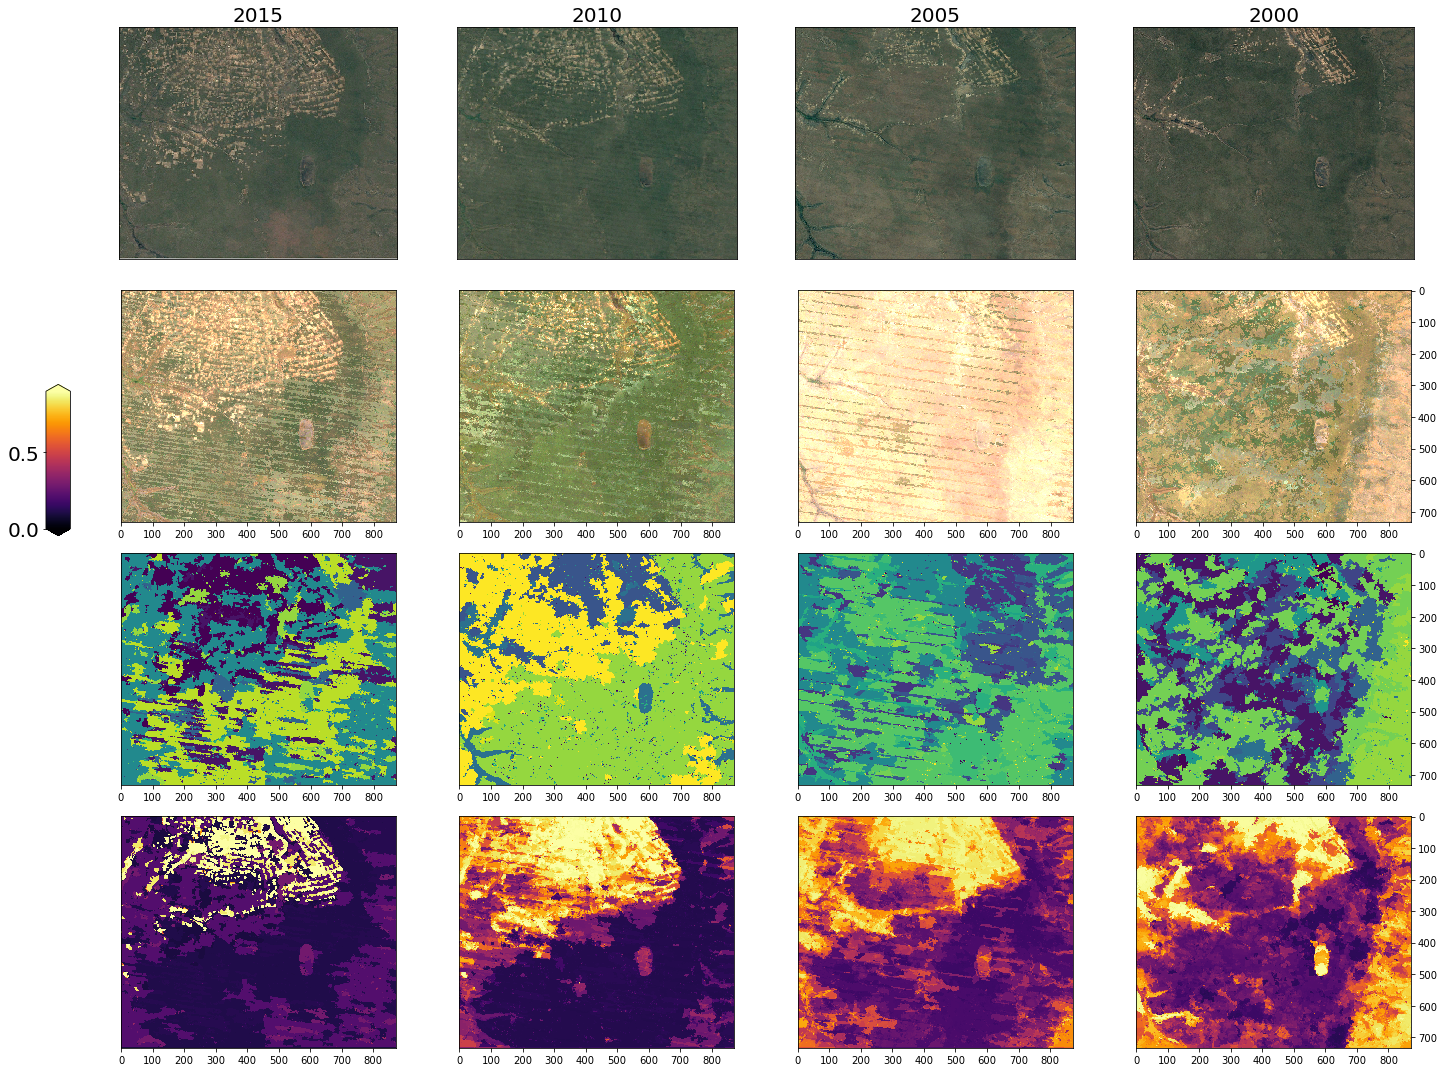

In [22]:
fig, axs = pyplot.subplots(4, 4,figsize = [20,15]) # row, col
pyplot.subplots_adjust(bottom=0.5, top=1, hspace=0)
subplt_title_size = 20
#fig.set_size_inches(20.5, 12.5)

# Google Image
from matplotlib import image

axs[0,0].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2015.png'))
axs[0,0].set_title("2015",fontsize=subplt_title_size)
axs[0,1].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2010.png'))
axs[0,1].set_title("2010",fontsize=subplt_title_size)
axs[0,2].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2005_b.png'))
axs[0,2].set_title("2005",fontsize=subplt_title_size)
axs[0,3].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2000_b.png'))
axs[0,3].set_title("2000",fontsize=subplt_title_size)

for i in range(4):
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[0,i].set_aspect(0.95)

#Landsat rgb
im00=axs[1,0].imshow(ls2015.rgb_stack.transpose(1,2,0))
#axs[1,0].set_title("2015",fontsize=subplt_title_size)
#axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[1,1].imshow(ls2010.rgb_stack.transpose(1,2,0)) 
#axs[1,1].set_title("2010",fontsize=subplt_title_size)
#axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(ls2005.rgb_stack.transpose(1,2,0))
#axs[1,2].set_title("2005",fontsize=subplt_title_size)
#axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

axs[1,3].imshow(ls2000.rgb_stack.transpose(1,2,0))
#axs[1,3].set_title("2000",fontsize=subplt_title_size)
axs[1,3].yaxis.set_label_position("right")
axs[1,3].yaxis.tick_right()

# cluster image
#colors = cmap(np.arange(20) % cmap.N)
im00=axs[2,0].imshow(clusters.cluster_2015)
#axs[2,0].set_title("2015",fontsize=subplt_title_size)
#axs[2,0].set_xticks([])
axs[2,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[2,1].imshow(clusters.cluster_2010) 
#axs[2,1].set_title("2010",fontsize=subplt_title_size)
#axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

axs[2,2].imshow(clusters.cluster_2005)
#axs[2,2].set_title("2005",fontsize=subplt_title_size)
#axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

axs[2,3].imshow(clusters.cluster_2000)
#axs[2,3].set_title("2000",fontsize=subplt_title_size)
axs[2,3].yaxis.set_label_position("right")
axs[2,3].yaxis.tick_right()

# BULCU outputs
im00=axs[3,0].imshow(test1.get_crop_year(0), cmap='inferno')
#axs[3,0].set_title("2015",fontsize=subplt_title_size)
#axs[3,0].set_xticks([])
axs[3,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[3,1].imshow(test1.get_crop_year(5), cmap='inferno') #YlGn is friendly for people who can't distinguish red-green (RdYlGn)
#axs[3,1].set_title("2010",fontsize=subplt_title_size)
#axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

axs[3,2].imshow(test1.get_crop_year(10), cmap='inferno')
#axs[3,2].set_title("2005",fontsize=subplt_title_size)
#axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

axs[3,3].imshow(test1.get_crop_year(15), cmap='inferno')
#axs[3,3].set_title("2000",fontsize=subplt_title_size)
axs[3,3].yaxis.set_label_position("right")
axs[3,3].yaxis.tick_right()
cmap1 = pyplot.get_cmap('inferno')
cmap1.set_bad(color = 'black', alpha = 1.)

# add color bar for row 1
cb_ax = fig.add_axes([0.0, 0.5, 0.017, 0.140]) # left, y, width, length
cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

# shapelet---------
# axs[3,0].imshow(test1.get_crop_year_slope_masked(0, init_crop_mask), cmap=cmap1)
# axs[3,0].set_title("2015",fontsize=subplt_title_size)
# #axs[3,0].set_xticks([])
# axs[3,0].set_yticks([])


# axs[3,1].imshow(hotspots003, cmap=newcmp)
# axs[3,1].set_title("2010",fontsize=subplt_title_size)

# #axs[3,1].set_xticks([])
# axs[3,1].set_yticks([])

# axs[3,2].imshow(hotspots002, cmap=newcmp)
# axs[3,2].set_title("2005",fontsize=subplt_title_size)
# #axs[3,2].set_xticks([])
# axs[3,2].set_yticks([])

# axs[3,3].imshow(hotspots001, cmap=newcmp)
# axs[3,3].set_title("2000",fontsize=subplt_title_size)
# axs[3,3].yaxis.set_label_position("right")
# axs[3,3].yaxis.tick_right()
# add color bar for row 1
# cb_ax = fig.add_axes([0.0, 0.339, 0.017, 0.315]) # left, y, width, length
# cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
# cbar.ax.tick_params(labelsize=20)
# cb_ax.yaxis.set_ticks_position('left')



fig.tight_layout()
#pyplot.savefig("output_figures/comprehensive_analytical_maps_v2.png",bbox_inches='tight')

In [ ]:
fig, axs = pyplot.subplots(6, 4,figsize = [24,33]) # row, col
pyplot.subplots_adjust(bottom=0.5, top=1, hspace=0)
subplt_title_size = 20
#fig.set_size_inches(20.5, 12.5)

# Google Image
from matplotlib import image

axs[0,0].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2015.png'))
axs[0,0].set_title("2015",fontsize=subplt_title_size)
axs[0,1].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2010.png'))
axs[0,1].set_title("2010",fontsize=subplt_title_size)
axs[0,2].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2005_b.png'))
axs[0,2].set_title("2005",fontsize=subplt_title_size)
axs[0,3].imshow(image.imread('/media/sitian/TB/BULCU_project/Script/output_figures/gi2000_b.png'))
axs[0,3].set_title("2000",fontsize=subplt_title_size)

for i in range(4):
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[0,i].set_aspect(0.95)

#Landsat rgb
im00=axs[1,0].imshow(ls2015.rgb_stack.transpose(1,2,0))
axs[1,0].set_title("2015",fontsize=subplt_title_size)
#axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[1,1].imshow(ls2010.rgb_stack.transpose(1,2,0)) 
axs[1,1].set_title("2010",fontsize=subplt_title_size)
#axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(ls2005.rgb_stack.transpose(1,2,0))
axs[1,2].set_title("2005",fontsize=subplt_title_size)
#axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

axs[1,3].imshow(ls2000.rgb_stack.transpose(1,2,0))
axs[1,3].set_title("2000",fontsize=subplt_title_size)
axs[1,3].yaxis.set_label_position("right")
axs[1,3].yaxis.tick_right()

# cluster image
#colors = cmap(np.arange(20) % cmap.N)
im00=axs[2,0].imshow(clusters.cluster_2015)
axs[2,0].set_title("2015",fontsize=subplt_title_size)
#axs[2,0].set_xticks([])
axs[2,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[2,1].imshow(clusters.cluster_2010) 
axs[2,1].set_title("2010",fontsize=subplt_title_size)
#axs[2,1].set_xticks([])
axs[2,1].set_yticks([])

axs[2,2].imshow(clusters.cluster_2005)
axs[2,2].set_title("2005",fontsize=subplt_title_size)
#axs[2,2].set_xticks([])
axs[2,2].set_yticks([])

axs[2,3].imshow(clusters.cluster_2000)
axs[2,3].set_title("2000",fontsize=subplt_title_size)
axs[2,3].yaxis.set_label_position("right")
axs[2,3].yaxis.tick_right()

# BULCU outputs
im00=axs[3,0].imshow(test1.get_crop_year(0), cmap='inferno')
axs[3,0].set_title("2015",fontsize=subplt_title_size)
#axs[3,0].set_xticks([])
axs[3,0].set_yticks([])
#fig.colorbar(im00, ax=axs[0])
axs[3,1].imshow(test1.get_crop_year(5), cmap='inferno') #YlGn is friendly for people who can't distinguish red-green (RdYlGn)
axs[3,1].set_title("2010",fontsize=subplt_title_size)
#axs[3,1].set_xticks([])
axs[3,1].set_yticks([])

axs[3,2].imshow(test1.get_crop_year(10), cmap='inferno')
axs[3,2].set_title("2005",fontsize=subplt_title_size)
#axs[3,2].set_xticks([])
axs[3,2].set_yticks([])

axs[3,3].imshow(test1.get_crop_year(15), cmap='inferno')
axs[3,3].set_title("2000",fontsize=subplt_title_size)
axs[3,3].yaxis.set_label_position("right")
axs[3,3].yaxis.tick_right()
cmap1 = pyplot.get_cmap('inferno')
cmap1.set_bad(color = 'black', alpha = 1.)

# add color bar for row 1
cb_ax = fig.add_axes([0.0, 0.345, 0.017, 0.140]) # left, y, width, length
cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

# shapelet---------
# axs[3,0].imshow(test1.get_crop_year_slope_masked(0, init_crop_mask), cmap=cmap1)
# axs[3,0].set_title("2015",fontsize=subplt_title_size)
# #axs[3,0].set_xticks([])
# axs[3,0].set_yticks([])


# axs[3,1].imshow(hotspots003, cmap=newcmp)
# axs[3,1].set_title("2010",fontsize=subplt_title_size)

# #axs[3,1].set_xticks([])
# axs[3,1].set_yticks([])

# axs[3,2].imshow(hotspots002, cmap=newcmp)
# axs[3,2].set_title("2005",fontsize=subplt_title_size)
# #axs[3,2].set_xticks([])
# axs[3,2].set_yticks([])

# axs[3,3].imshow(hotspots001, cmap=newcmp)
# axs[3,3].set_title("2000",fontsize=subplt_title_size)
# axs[3,3].yaxis.set_label_position("right")
# axs[3,3].yaxis.tick_right()
# add color bar for row 1
# cb_ax = fig.add_axes([0.0, 0.339, 0.017, 0.315]) # left, y, width, length
# cbar = fig.colorbar(im00, cax=cb_ax,extend='both')
# cbar.ax.tick_params(labelsize=20)
# cb_ax.yaxis.set_ticks_position('left')


# Slope image
im20 = axs[4,0].imshow(slope_image*-1, cmap='RdBu') #viridis_r; plasma_r; inferno_r
axs[4,0].set_title("Slope image",fontsize=subplt_title_size)
#axs[4,0].set_xticks([])
axs[4,0].set_yticks([])

axs[4,1].imshow(test1.mask_of_slope(-0.03), cmap='Greys_r')
axs[4,1].set_title("slope threshold=0.03",fontsize=subplt_title_size)
#axs[4,1].set_xticks([])
axs[4,1].set_yticks([])

axs[4,2].imshow(test1.mask_of_slope(-0.02), cmap='Greys_r')
axs[4,2].set_title("slope threshold=0.02",fontsize=subplt_title_size)
#axs[4,2].set_xticks([])
axs[4,2].set_yticks([])


axs[4,3].imshow(test1.mask_of_slope(-0.01), cmap='Greys_r')
axs[4,3].set_title("slope threshold=0.01",fontsize=subplt_title_size)
axs[4,3].yaxis.set_label_position("right")
axs[4,3].yaxis.tick_right()

# add color bar for row 3
cb_ax = fig.add_axes([0.0, 0.176, 0.017, 0.140]) # left, y,width, length
cbar = fig.colorbar(im20, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')





# Shapelet image masked by slope
im50 = axs[5,0].imshow(shapelet_year, cmap='Spectral_r') #viridis_r; plasma_r; inferno_r
axs[5,0].set_title("Shapelet image \n (no mask)",fontsize=subplt_title_size)
#axs[5,0].set_xticks([])
axs[5,0].set_yticks([])

axs[5,1].imshow(shapelet_year003, cmap='Spectral_r')
axs[5,1].set_title("Shapelet image (masked) \n slope threshold=0.03",fontsize=subplt_title_size)
#axs[5,1].set_xticks([])
axs[5,1].set_yticks([])

axs[5,2].imshow(shapelet_year002, cmap='Spectral_r')
axs[5,2].set_title("Shapelet image (masked) \n slope threshold=0.02",fontsize=subplt_title_size)
#axs[5,2].set_xticks([])
axs[5,2].set_yticks([])

axs[5,3].imshow(shapelet_year001, cmap='Spectral_r')
axs[5,3].set_title("Shapelet image (masked) \n hreshold=0.01",fontsize=subplt_title_size)
axs[5,3].yaxis.set_label_position("right")
axs[5,3].yaxis.tick_right()

cb_ax = fig.add_axes([0.0, 0.01, 0.017, 0.140]) # left, y,width, length
cbar = fig.colorbar(im50, cax=cb_ax,extend='both')
cbar.ax.tick_params(labelsize=20)
cb_ax.yaxis.set_ticks_position('left')

fig.tight_layout()
#pyplot.savefig("output_figures/comprehensive_analytical_maps_v2.png",bbox_inches='tight')